In [93]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.tree import DecisionTreeClassifier #builds a classification tree
from sklearn.tree import plot_tree #draws a classification tree
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix #creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets
#Add this if you're using Jupyter Notebook


In [28]:
#I saved the excel files to the same folder as my jupyter notebook,
#this command uses pandas to create a data frame from the .xlsx.
application_train = pd.read_excel("application_train.xlsx")

In [29]:
#This just prints out my data so that I can visually verify it pulled the information from the .xlsx file properly.
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#This converted all of the FLAG_OWN_REALTY Y or N answers to actual numbers so that they could be used later.
df = application_train.replace({'FLAG_OWN_REALTY':{'Y':1, 'N':0}})

In [31]:
#this just prints out my data so that I can visually verify that FLAG_OWN_REALTY was converted to numerical values.
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#this creates a new data frame with my 10 chosen variables
newdf = df.filter(['TARGET', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

In [33]:
#this prints my new data frame so that I can visually verify that it contains all 10 variables.
newdf


,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,1,406597.5,24700.5,351000.0,-9461,-637,0.083037,0.262949,0.139376
1,0,0,1293502.5,35698.5,1129500.0,-16765,-1188,0.311267,0.622246,NaN
2,0,1,135000.0,6750.0,135000.0,-19046,-225,NaN,0.555912,0.729567
3,0,1,312682.5,29686.5,297000.0,-19005,-3039,NaN,0.650442,NaN
4,0,1,513000.0,21865.5,513000.0,-19932,-3038,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...
307506,0,0,254700.0,27558.0,225000.0,-9327,-236,0.145570,0.681632,NaN
307507,0,1,269550.0,12001.5,225000.0,-20775,365243,NaN,0.115992,NaN
307508,0,1,677664.0,29979.0,585000.0,-14966,-7921,0.744026,0.535722,0.218859
307509,1,1,370107.0,20205.0,319500.0,-11961,-4786,NaN,0.514163,0.661024


array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'FLAG_OWN_REALTY'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

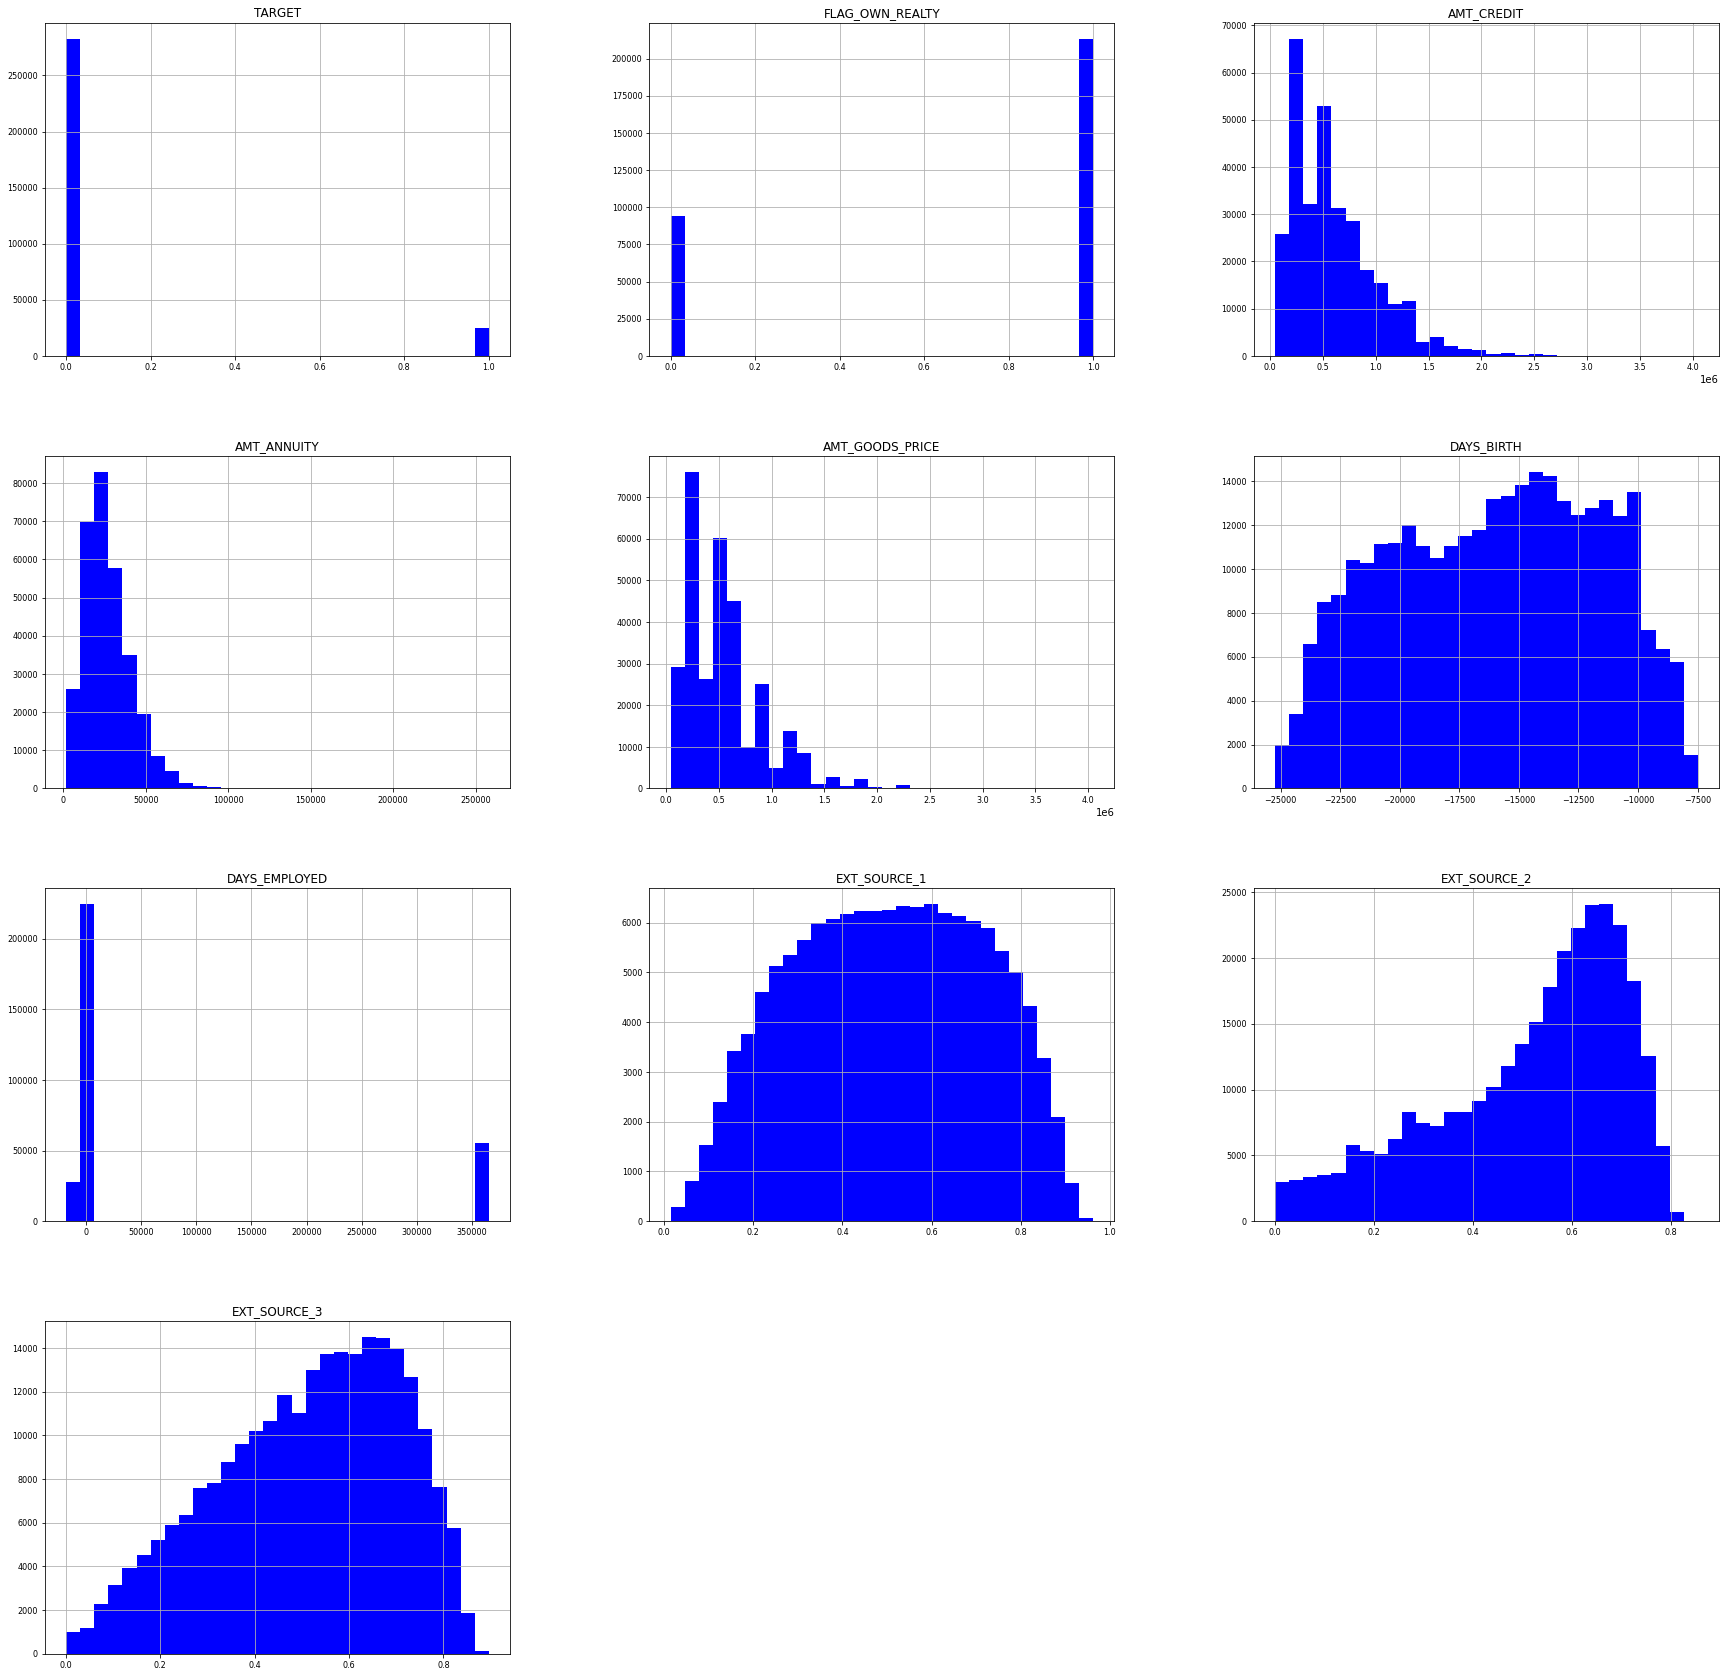

In [34]:
#this creates histograms for my 10 catagories. The code runs by selecting all columns that contain only real numbers.
#Then running .hist on these columns. (in this case that is all 10 of mine)
#I used this to quickly plot all of the data and then used the descriptions of each variable, along with
#their histograms to decide which to choose.

#VARIABLE CHOICE JUSTIFICATION:
#TARGET ---------- Represents client having difficulty making payments. This sounded like an obvious reason why someone
#                  should or should not get a loan. If there is difficulty then they shouldnt be approved.

#FLAG_OWN_REALTY - Owning property means that someone has been good enough with their money in the past to afford one
#                  and that they have the ability to take out money vs their house should they need to pay the loan back.

#AMT_CREDIT ------ If the loan amount is higher then justification for needing a larger one would need to be stronger.
#                  It would require more proof to get and effect if someone should be approved.

#AMT_ANNUITY ----- Annuity of a loan matters a lot because it is like pulling money you have already paid back out. If it is
#                  a large amount this would effect loan approval because more justification would be needed. Especially
#                  considering it is usually paid back in monthly installments. A higher amount would mean
#                  higher monthly payments and less likely to get approved.

#AMT_GOODS_PRICE - A higher priced object would mean more money would be needed to pay it back so a strong income would
#                  need to be shown, making it harder for someone with low income to get a loan.

#DAYS_BIRTH ------ In society, older people tend to have more money till a certain age. Being in the sweet spot could make it
#                  easier to get a loan.

#DAYS_EMPLOYED --- A long employment time ensures a steady stream of continued income for the borrower making them more
#                  trustworthy to give a loan to. It also shows a level of committment that would hopefully transfer to 
#                  also paying back the loan.

#EXT_SOURCE_1 ---- These 3 all share the same reasoning. External data sources to me sound like either referances or algorithms
#EXT_SOURCE_2 ---- based off other factors. After being in the MS AAI course I understand how powerful these can be. Since they
#EXT_SOURCE_3 ---- are given their own categories, I would assume they are important in determining a loan approval. When I 
#                  graphed their histograms they also gave me a nice bell curve which also signaled they may be significant.

num_features = newdf.select_dtypes(include = ['float64', 'int64']).columns
newdf[num_features].hist(figsize=(30, 30), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

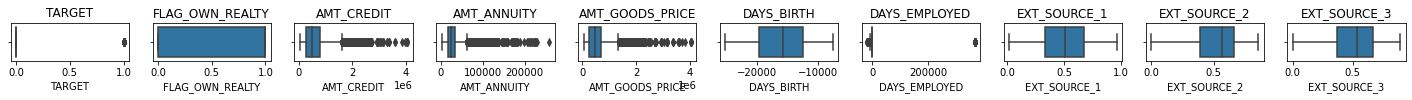

In [35]:
#this creates box plots of all my 
plt.figure(figsize=(25, 25))
for i, col in enumerate(newdf):
    plt.subplot(30, 10, i+1)
    sns.boxplot(data=newdf, x=col)
    plt.title(col)

In [36]:
df1 = newdf.corr()
df1

,TARGET,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.006148,-0.030369,-0.012817,-0.039645,0.078239,-0.044932,-0.155317,-0.160472,-0.178919
FLAG_OWN_REALTY,-0.006148,1.000000,-0.039270,-0.005225,-0.045537,-0.119146,0.069677,0.080234,0.002576,0.040281
AMT_CREDIT,-0.030369,-0.039270,1.000000,0.770138,0.986968,-0.055436,-0.066838,0.168429,0.131228,0.043516
AMT_ANNUITY,-0.012817,-0.005225,0.770138,1.000000,0.775109,0.009445,-0.104332,0.119398,0.125804,0.030752
AMT_GOODS_PRICE,-0.039645,-0.045537,0.986968,0.775109,1.000000,-0.053442,-0.064842,0.175502,0.139367,0.047717
DAYS_BIRTH,0.078239,-0.119146,-0.055436,0.009445,-0.053442,1.000000,-0.615864,-0.600610,-0.091996,-0.205478
DAYS_EMPLOYED,-0.044932,0.069677,-0.066838,-0.104332,-0.064842,-0.615864,1.000000,0.289848,-0.020767,0.113434
EXT_SOURCE_1,-0.155317,0.080234,0.168429,0.119398,0.175502,-0.600610,0.289848,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.002576,0.131228,0.125804,0.139367,-0.091996,-0.020767,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.040281,0.043516,0.030752,0.047717,-0.205478,0.113434,0.186846,0.109167,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

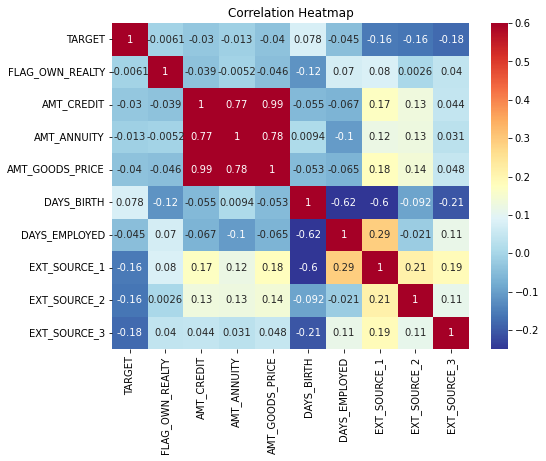

In [37]:
#This plots a heat map of the correlation between variables. The middle red section with numbers closer to one indicate
#more correlation.
plt.figure(figsize=(8, 6))
sns.heatmap(df1, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap')

In [38]:
#CLASSIFICATION TREE
newdf.dtypes #tells us what kind of data we are working with

TARGET               int64
FLAG_OWN_REALTY      int64
AMT_CREDIT         float64
AMT_ANNUITY        float64
AMT_GOODS_PRICE    float64
DAYS_BIRTH           int64
DAYS_EMPLOYED        int64
EXT_SOURCE_1       float64
EXT_SOURCE_2       float64
EXT_SOURCE_3       float64
dtype: object

In [40]:
#we can chekck to see how many rows we have in total
len(newdf)

307511

In [41]:
print(newdf.isnull().sum()) #we need to first identify which catagories have NaN(missing values)
#we also want to see how many rows are effected by this.

TARGET                  0
FLAG_OWN_REALTY         0
AMT_CREDIT              0
AMT_ANNUITY            12
AMT_GOODS_PRICE       278
DAYS_BIRTH              0
DAYS_EMPLOYED           0
EXT_SOURCE_1       173378
EXT_SOURCE_2          660
EXT_SOURCE_3        60965
dtype: int64


In [42]:
#now we want a new data set that only includes rows that do not say NaN. To do this we can drop all
#rows that say NaN
newdf_no_NaN = newdf.dropna()


In [43]:
#Now we can check to see how many rows of data we are left with
len(newdf_no_NaN)

109483

In [44]:
X = newdf_no_NaN.drop('TARGET', axis = 1).copy() #this makes a copy of the data while removing 'TARGET'
X.head() #because 'TARGET' is what we are trying to predict
            

,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,406597.5,24700.5,351000.0,-9461,-637,0.083037,0.262949,0.139376
6,1,1560726.0,41301.0,1395000.0,-13778,-3130,0.774761,0.724000,0.492060
8,1,1019610.0,33826.5,913500.0,-20099,365243,0.587334,0.205747,0.751724
10,1,652500.0,21177.0,652500.0,-10197,-679,0.319760,0.651862,0.363945
11,1,148365.0,10678.5,135000.0,-20417,365243,0.722044,0.555183,0.652897


In [45]:
y = newdf_no_NaN['TARGET'].copy() #this makes a new copy of the column of data we want to predict
y.head() #we have now split the data into two pieces

0     1
6     0
8     0
10    0
11    0
Name: TARGET, dtype: int64

In [51]:
#now we can make the classification tree by first splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#now we can create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clft_dt = DecisionTreeClassifier(random_state=42, max_depth=3) #new variable to limit depth when plotting tree
clft_dt = clft_dt.fit(X_train, y_train) #new variable to limit depth when plotting tree
clf_dt = clf_dt.fit(X_train, y_train)

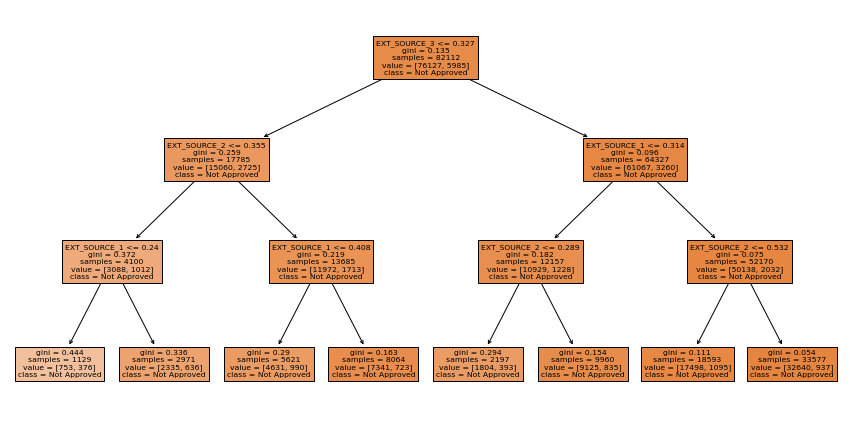

In [52]:
plt.figure(figsize=(15, 7.5))
plot_tree(clft_dt,
         filled=True,
         class_names=['Not Approved', 'Yes Approved'],
         feature_names=X.columns);


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


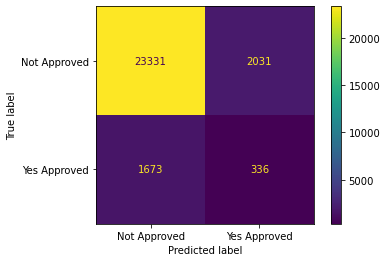

In [54]:
#We then graph the confusion matrix of our data in order to see the result.
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not Approved", "Yes Approved"])

#The confusion matrix below says that 23331+2031 = 25362 were not approved and 23331 of those were correctly classified.
#The confusion matrix also says that 1673+336 = 2009 were approved and 336 were properly classified. 

In [55]:
#Now we want to prune the tree using cost complexity pruning. We can simplify the process of finding a smaller tree that
#improves the accuracy with the testing dataset. In order to do this we want to find the proper value of our pruning 
#parameter alpha. We do this by extracting the different values of aplha that are available for our tree and build a pruned
#tree for each value alpha. We leave out the maximum value of alpha with ccp_alphas = ccp_alphas[:-1] because it would
#prune all leaves, leaving us with only a root instead of a tree.
#path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
#ccp_alphas = path.ccp_alphas #extract different values for alpha
#ccp_alphas = ccp_alphas[:-1] #exclude maximum value for alpha
#clf_dts = [] #created an array that we will put decision trees into

##now create one decision tree per value of alpha and store it in the array 
#for ccp_alpha in ccp_alphas:
#    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
#    clf_dt.fit(X_train, y_train)
#   clf_dts.append(clf_dt)
    

In [56]:
######################################################################################################
#Now we want to create a tree using all of the columns of data from the test data set to see
#if any of them are more "important" than the 10 catagories I chose.
#Now we want to change whatever columns only have two variables to 1's and 0's. EMERGENCYSTATE_MODE
#is the only other column besides FLAG_OWN_REALTY, which we changed before.
#We save this in a new data frame dfall.
dfall = df.replace({'EMERGENCYSTATE_MODE':{'Yes':1, 'No':0}})
dfall

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
len(dfall)

307511

In [58]:
df_Dummy = dfall.dropna()

In [59]:
#We run dummy after we drop all rows that have NaN(missing values). Unfortunately this is an action
#that removes the majority of our data entries. We go from 307511 entries to 8602.
len(df_Dummy)

8602

In [60]:
#now we can run the dummy command to do One-Hot Encoding. This creates new columns for any columns
#that had more than one category and assigns them either a 1 or 0 depending on if they have
#that category. We can store it in a new data frame called dfdummy.
dfdummy = pd.get_dummies(df_Dummy, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [61]:
#we can run dfall to visially check the code. As we see below, more columns were added.
#Our data frame jumped from 122 columns to 244 columns
dfdummy

,SK_ID_CURR,TARGET,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
71,100083,0,1,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,...,1,0,0,0,0,0,0,0,1,0
124,100145,0,1,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,...,1,0,0,0,0,0,0,1,0,0
152,100179,0,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,...,1,0,0,0,0,1,0,0,0,0
161,100190,0,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,...,1,0,0,0,0,0,0,1,0,0
255,100295,1,0,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,1,2,112500.0,361462.5,16051.5,274500.0,0.025164,-15006,...,1,0,0,0,0,0,0,0,1,0
307359,456084,0,1,1,99000.0,675000.0,21906.0,675000.0,0.020246,-14007,...,1,0,0,0,0,0,0,1,0,0
307407,456140,1,1,1,261000.0,711454.5,47673.0,643500.0,0.018850,-11407,...,1,0,0,0,0,0,0,1,0,0
307456,456195,0,1,0,94500.0,270000.0,15075.0,270000.0,0.028663,-20246,...,1,0,0,0,0,0,0,0,1,0


In [62]:
#Now we will go through a similar process to we did for the previous tree.

In [66]:
#we can set our X1 variable to our dataframe without the target column.
X1 = dfdummy.drop('TARGET', axis = 1).copy()
X1.head()

,SK_ID_CURR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
71,100083,1,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,1,0,0,0,0,0,0,0,1,0
124,100145,1,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,1,0,0,0,0,0,0,1,0,0
152,100179,0,0,202500.0,675000.0,53329.5,675000.0,0.031329,-11375,-2311,...,1,0,0,0,0,1,0,0,0,0
161,100190,0,0,162000.0,263686.5,24781.5,238500.0,0.022625,-13972,-4472,...,1,0,0,0,0,0,0,1,0,0
255,100295,0,1,225000.0,1019205.0,31032.0,774000.0,0.072508,-11356,-602,...,1,0,0,0,0,0,0,1,0,0


In [142]:
#we can then set our y variable to our target column
y1 = dfdummy['TARGET'].copy()
y1.head()


71     0
124    0
152    0
161    0
255    1
Name: TARGET, dtype: int64

In [167]:


#now we can create a random forest and fit it to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state = 50, verbose = 1, n_jobs = -1)
rfc.fit(X1, y1)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [168]:
#now we can create our graph of the different levels of importance
imp = rfc.feature_importances_
imp_sort = np.argsort(imp)[::-1] #this sorts by level of importance

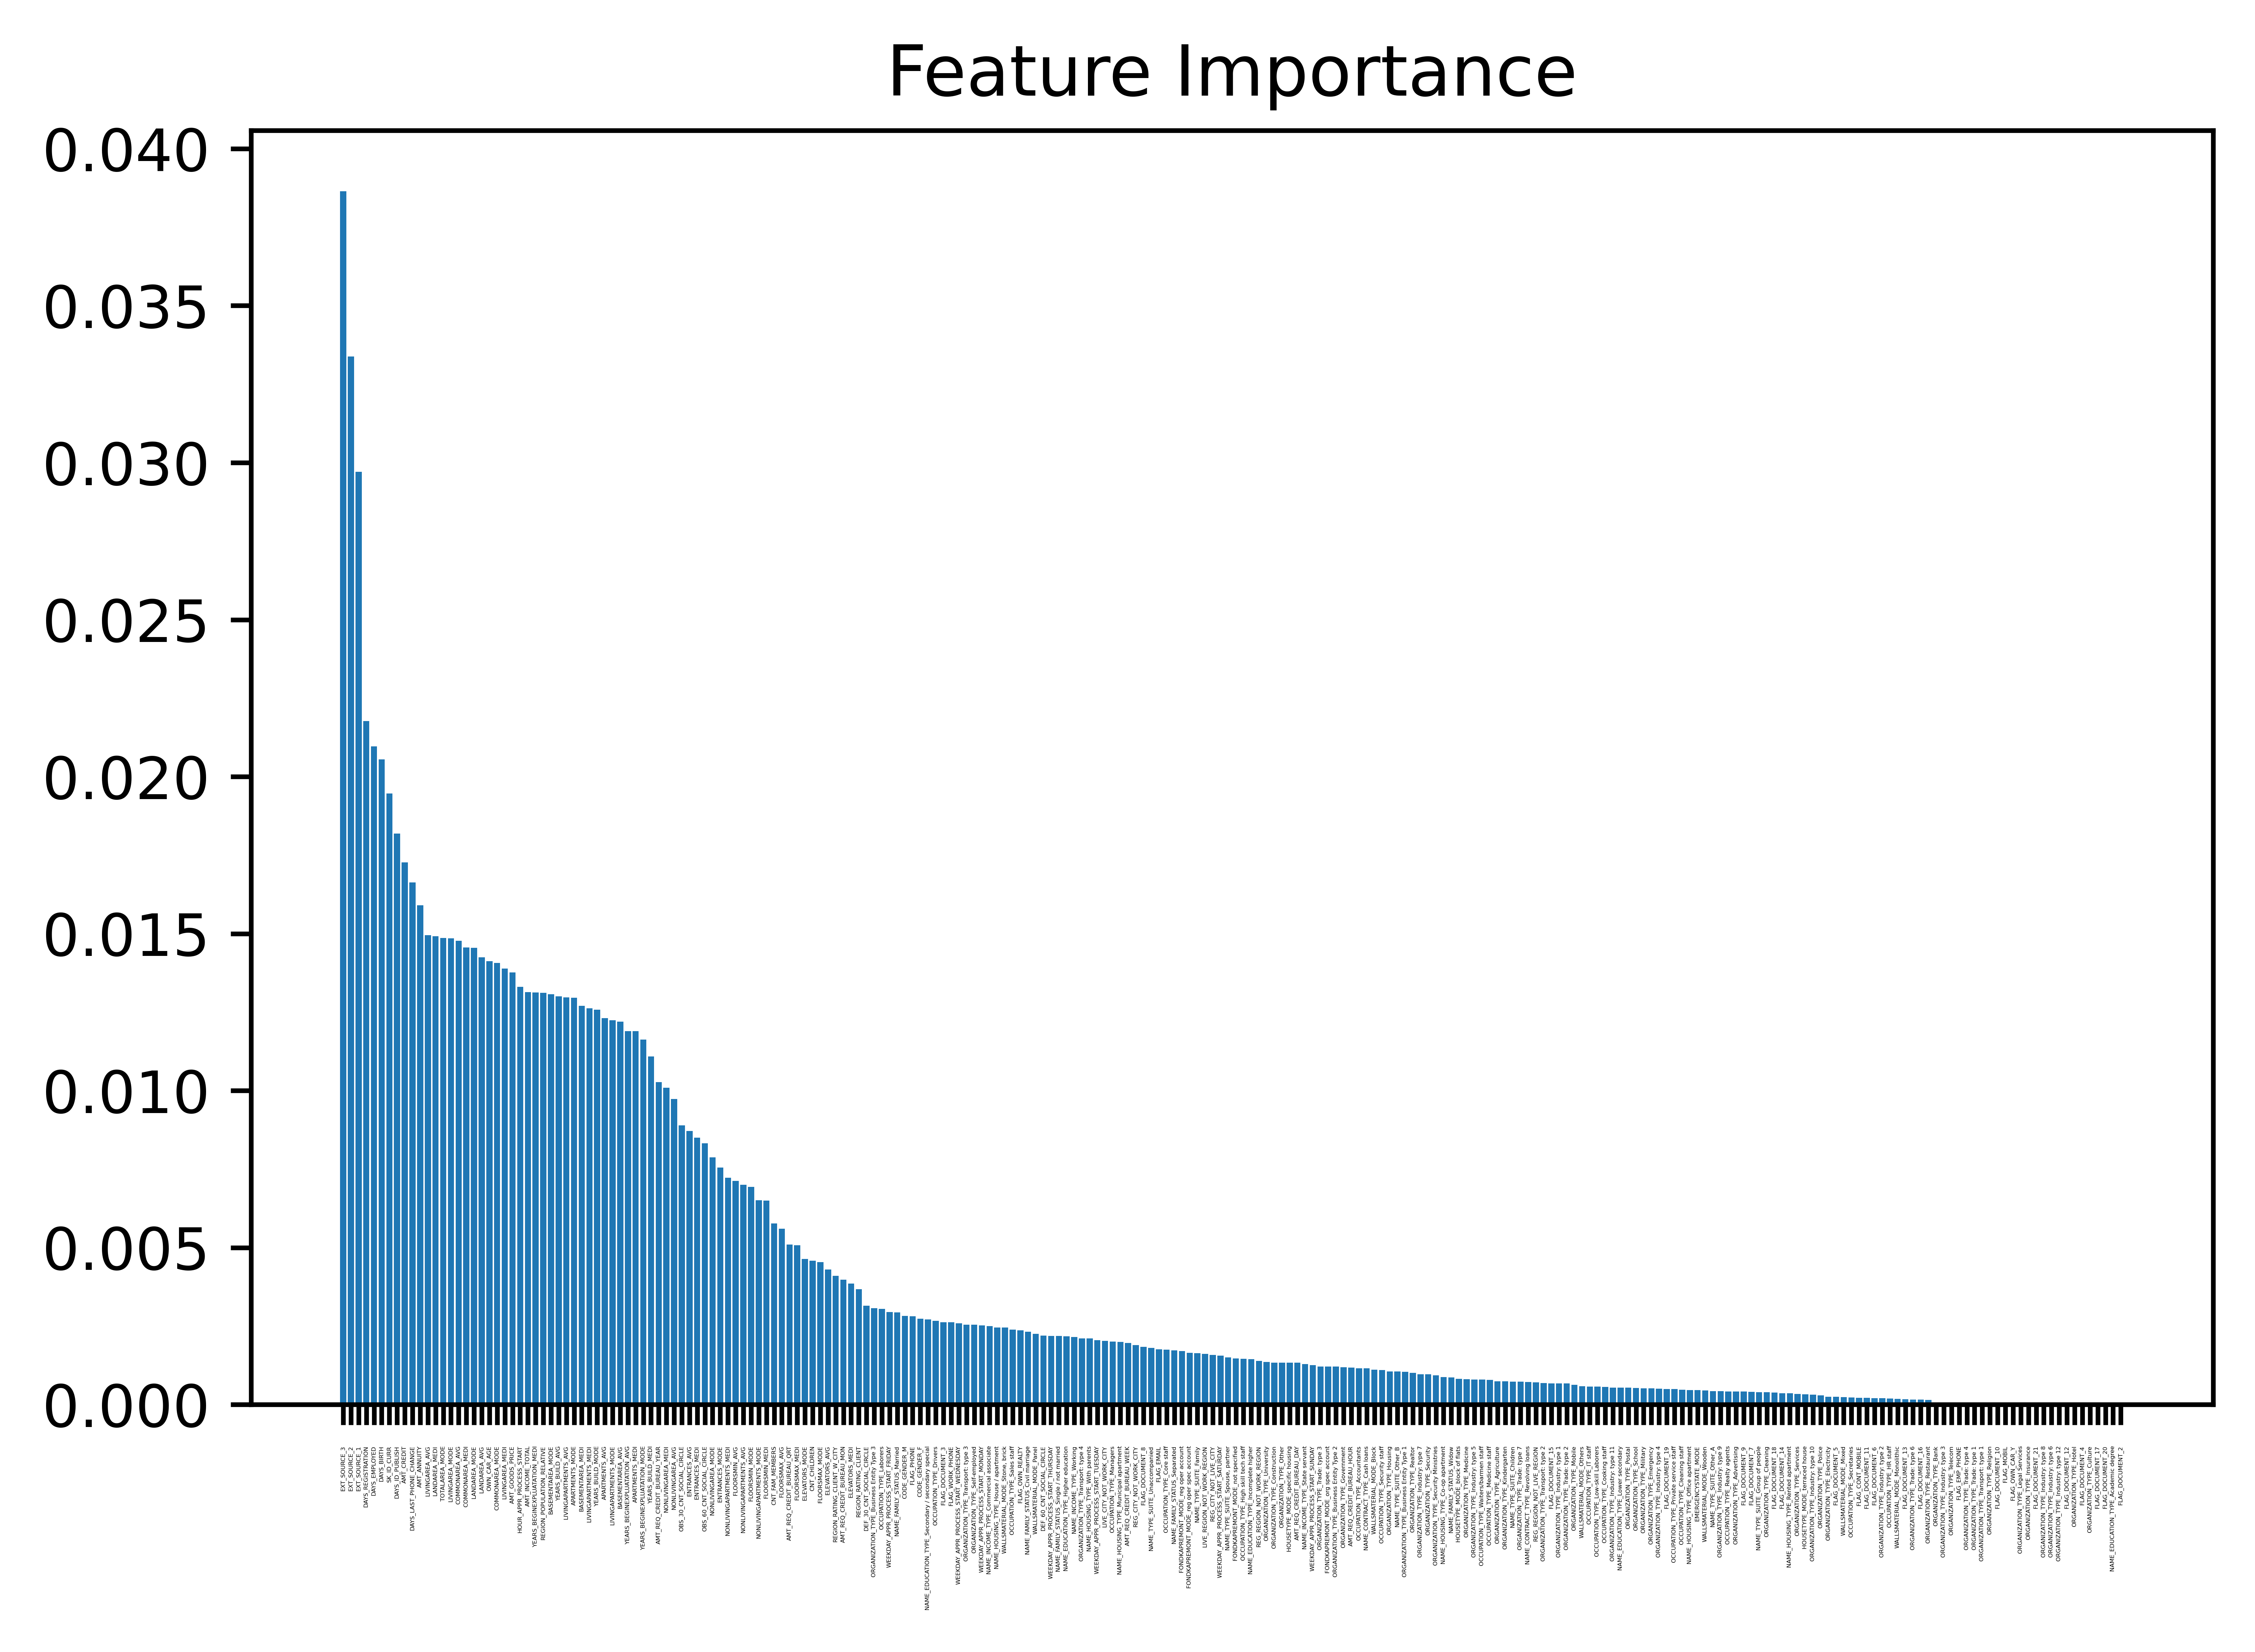

In [170]:
#this sets the parameters of our bar chart
plt.figure(dpi=1200)
plt.title("Feature Importance")
plt.bar(range(X1.shape[1]), imp[imp_sort], align = 'center')
plt.xticks(range(X1.shape[1]), X1.columns[imp_sort], rotation = 90)
plt.tick_params(axis = 'x', which='major', labelsize = 1)
plt.show()

In [171]:
#RESULTS: My selected variables were:
#TARGET
#FLAG_OWN_REALTY
#AMT_CREDIT
#AMT_ANNUITY
#AMT_GOODS_PRICE
#DAYS_BIRTH
#DAYS_EMPLOYED
#EXT_SOURCE_1 
#EXT_SOURCE_2
#EXT_SOURCE_3

#We already know that TARGET will be dropped from by 10 variables because it was actually our 
#target column which I learned after selecting it. According to the random forest,
#from most significant to least our top 10 are now:
#EXT_SOURCE_3
#EXT_SOURCE_2
#EXT_SOURCE_1
#DAYS_REGISTRATION*
#DAYS_EMPLOYED
#DAYS_BIRTH
#SK_ID_CURR*
#DAYS_ID_PUBLISH*
#AMT_CREDIT
#DAYS_LAST_PHONE_CHANGE*

#From these results we can see that there are 4 new* variables that will replce the following in my
#top 10:
#AMT_GOODS_PRICE
#AMT_ANNUITY
#FLAG_OWN_REALTY
#TARGET

#We can now test these new variables by running a random forest and classification tree for the 
#specific top 10 variables and comparing it to the results from our previously selected 10 variables
#using the decision matrix.

In [172]:
#NEW DECISION TREE
#first we want to make a new data frame with only our top 10 values.
newdf2 = df.filter(['TARGET', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_CREDIT', 'SK_ID_CURR', 'DAYS_REGISTRATION', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

In [173]:
#then we can visialize our new data frame of top 10 values and TARGET column
newdf2

,TARGET,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_CREDIT,SK_ID_CURR,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,-1134.0,-2120,406597.5,100002,-3648.0,-9461,-637,0.083037,0.262949,0.139376
1,0,-828.0,-291,1293502.5,100003,-1186.0,-16765,-1188,0.311267,0.622246,NaN
2,0,-815.0,-2531,135000.0,100004,-4260.0,-19046,-225,NaN,0.555912,0.729567
3,0,-617.0,-2437,312682.5,100006,-9833.0,-19005,-3039,NaN,0.650442,NaN
4,0,-1106.0,-3458,513000.0,100007,-4311.0,-19932,-3038,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...
307506,0,-273.0,-1982,254700.0,456251,-8456.0,-9327,-236,0.145570,0.681632,NaN
307507,0,0.0,-4090,269550.0,456252,-4388.0,-20775,365243,NaN,0.115992,NaN
307508,0,-1909.0,-5150,677664.0,456253,-6737.0,-14966,-7921,0.744026,0.535722,0.218859
307509,1,-322.0,-931,370107.0,456254,-2562.0,-11961,-4786,NaN,0.514163,0.661024


In [174]:
#we can chekck to see how many rows we have in total
len(newdf2)

307511

In [175]:
print(newdf2.isnull().sum()) #we need to first identify which catagories have NaN(missing values)
#we also want to see how many rows are effected by this.

TARGET                         0
DAYS_LAST_PHONE_CHANGE         1
DAYS_ID_PUBLISH                0
AMT_CREDIT                     0
SK_ID_CURR                     0
DAYS_REGISTRATION              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
EXT_SOURCE_1              173378
EXT_SOURCE_2                 660
EXT_SOURCE_3               60965
dtype: int64


In [176]:
#now we want a new data set that only includes rows that do not say NaN. To do this we can drop all
#rows that say NaN
newdf2_no_NaN = newdf2.dropna()

In [177]:
#Now we can check to see how many rows of data we are left with
len(newdf_no_NaN)

109483

In [178]:
X5 = newdf_no_NaN.drop('TARGET', axis = 1).copy() #this makes a copy of the data while removing 'TARGET'
X5.head() #because 'TARGET' is what we are trying to predict

,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,406597.5,24700.5,351000.0,-9461,-637,0.083037,0.262949,0.139376
6,1,1560726.0,41301.0,1395000.0,-13778,-3130,0.774761,0.724000,0.492060
8,1,1019610.0,33826.5,913500.0,-20099,365243,0.587334,0.205747,0.751724
10,1,652500.0,21177.0,652500.0,-10197,-679,0.319760,0.651862,0.363945
11,1,148365.0,10678.5,135000.0,-20417,365243,0.722044,0.555183,0.652897


In [179]:
y5 = newdf_no_NaN['TARGET'].copy() #this makes a new copy of the column of data we want to predict
y5.head() #we have now split the data into two pieces

0     1
6     0
8     0
10    0
11    0
Name: TARGET, dtype: int64

In [180]:
#now we can make the classification tree by first splitting the data into training and testing sets.
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=42)

#now we can create a decision tree and fit it to the training data
clf_dt5 = DecisionTreeClassifier(random_state=42)
clft_dt5 = DecisionTreeClassifier(random_state=42, max_depth=3) #new variable to limit depth when plotting tree
clft_dt5 = clft_dt.fit(X5_train, y5_train) #new variable to limit depth when plotting tree
clf_dt5 = clf_dt.fit(X5_train, y5_train)

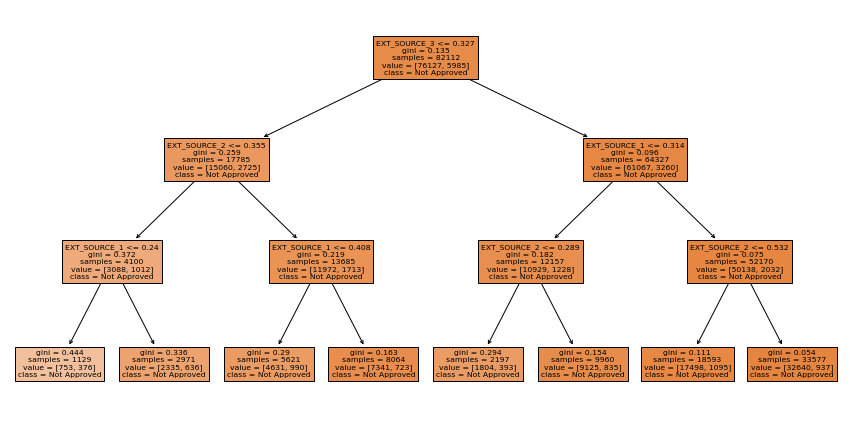

In [181]:
#we can now plot the decision tree with a depth of 3. As we would expect, the top 3 variables are the
#same as before.
plt.figure(figsize=(15, 7.5))
plot_tree(clft_dt5,
         filled=True,
         class_names=['Not Approved', 'Yes Approved'],
         feature_names=X.columns);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


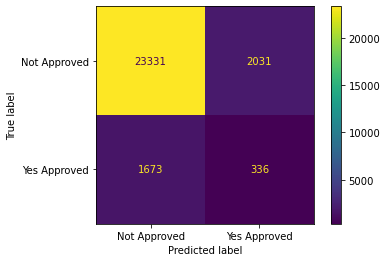

In [183]:
#We then graph the confusion matrix of our data in order to see the result.
plot_confusion_matrix(clf_dt5, X5_test, y5_test, display_labels=["Not Approved", "Yes Approved"])

#The confusion matrix below says that 23331+2031 = 25362 were not approved and 23331 of those were correctly classified.
#The confusion matrix also says that 1673+336 = 2009 were approved and 336 were properly classified.
#this tells us that the 10 new variables had the exact same accuracy as the previous 10 variables.
#This is because we had the same number of correct and incorrect predictions.
#We could assume that this could be due to the fact that the only variable of mine that was replaced
#that was significantly out of the top 10 was FLAG_OWN_REALTY. AMT_ANNUITY was ranked 11th so changing
#that wouldn't create much change and AMT_GOODS_PRICE was not much less significant than any of the 
#top 10 according to our bar graph. Another issue could be all of the data that is removed when we
#removed all rows that contained any NaN(empty) values. It significantly reduces our sample size for
#both of the decision trees.

In [184]:
#RANDOM FOREST REBUILD 
#This time we will not need to perform one hot encoding using the dummy command because all of our
#data is in the form of real numbers. We can confirm this by running the following:
newdf2.dtypes


TARGET                      int64
DAYS_LAST_PHONE_CHANGE    float64
DAYS_ID_PUBLISH             int64
AMT_CREDIT                float64
SK_ID_CURR                  int64
DAYS_REGISTRATION         float64
DAYS_BIRTH                  int64
DAYS_EMPLOYED               int64
EXT_SOURCE_1              float64
EXT_SOURCE_2              float64
EXT_SOURCE_3              float64
dtype: object

In [185]:
#We can now drop all of our Nan(empty) values by removing all rows that have them.
df_Random = newdf2.dropna()

In [186]:
#This lets us see that we went from 307511 rows to 109589 rows.
df_Random

,TARGET,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_CREDIT,SK_ID_CURR,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,-1134.0,-2120,406597.5,100002,-3648.0,-9461,-637,0.083037,0.262949,0.139376
6,0,-1562.0,-619,1560726.0,100009,-1213.0,-13778,-3130,0.774761,0.724000,0.492060
8,0,0.0,-3514,1019610.0,100011,-7427.0,-20099,365243,0.587334,0.205747,0.751724
10,0,-844.0,-738,652500.0,100014,-4427.0,-10197,-679,0.319760,0.651862,0.363945
11,0,-2396.0,-2512,148365.0,100015,-5246.0,-20417,365243,0.722044,0.555183,0.652897
...,...,...,...,...,...,...,...,...,...,...,...
307499,0,-1511.0,-509,225000.0,456243,-5396.0,-16988,-8694,0.665343,0.649123,0.206779
307500,0,-1459.0,-3906,1303812.0,456244,-157.0,-20390,-5326,0.896042,0.789389,0.337673
307503,0,-2315.0,-3936,345510.0,456247,-675.0,-11870,-399,0.243466,0.501221,0.609276
307508,0,-1909.0,-5150,677664.0,456253,-6737.0,-14966,-7921,0.744026,0.535722,0.218859


In [193]:
#we can set our X6 variable to our dataframe without the target column.
X6 = df_Random.drop('TARGET', axis = 1).copy()
X6.head()

,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_CREDIT,SK_ID_CURR,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,-1134.0,-2120,406597.5,100002,-3648.0,-9461,-637,0.083037,0.262949,0.139376
6,-1562.0,-619,1560726.0,100009,-1213.0,-13778,-3130,0.774761,0.724000,0.492060
8,0.0,-3514,1019610.0,100011,-7427.0,-20099,365243,0.587334,0.205747,0.751724
10,-844.0,-738,652500.0,100014,-4427.0,-10197,-679,0.319760,0.651862,0.363945
11,-2396.0,-2512,148365.0,100015,-5246.0,-20417,365243,0.722044,0.555183,0.652897


In [195]:
#we can then set our y variable to our target column
y6 = df_Random['TARGET'].copy()
y6.head()

0     1
6     0
8     0
10    0
11    0
Name: TARGET, dtype: int64

In [212]:
#now we can create a random forest and fit it to the training data
rfc6 = RandomForestClassifier(n_estimators=100, random_state = 50, verbose = 1, n_jobs = -1)
rfc6.fit(X6, y6)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [215]:
#now we can create our graph of the different levels of importance
imp6 = rfc6.feature_importances_
imp_sort6 = np.argsort(imp6)[::-1] #this sorts by level of importance

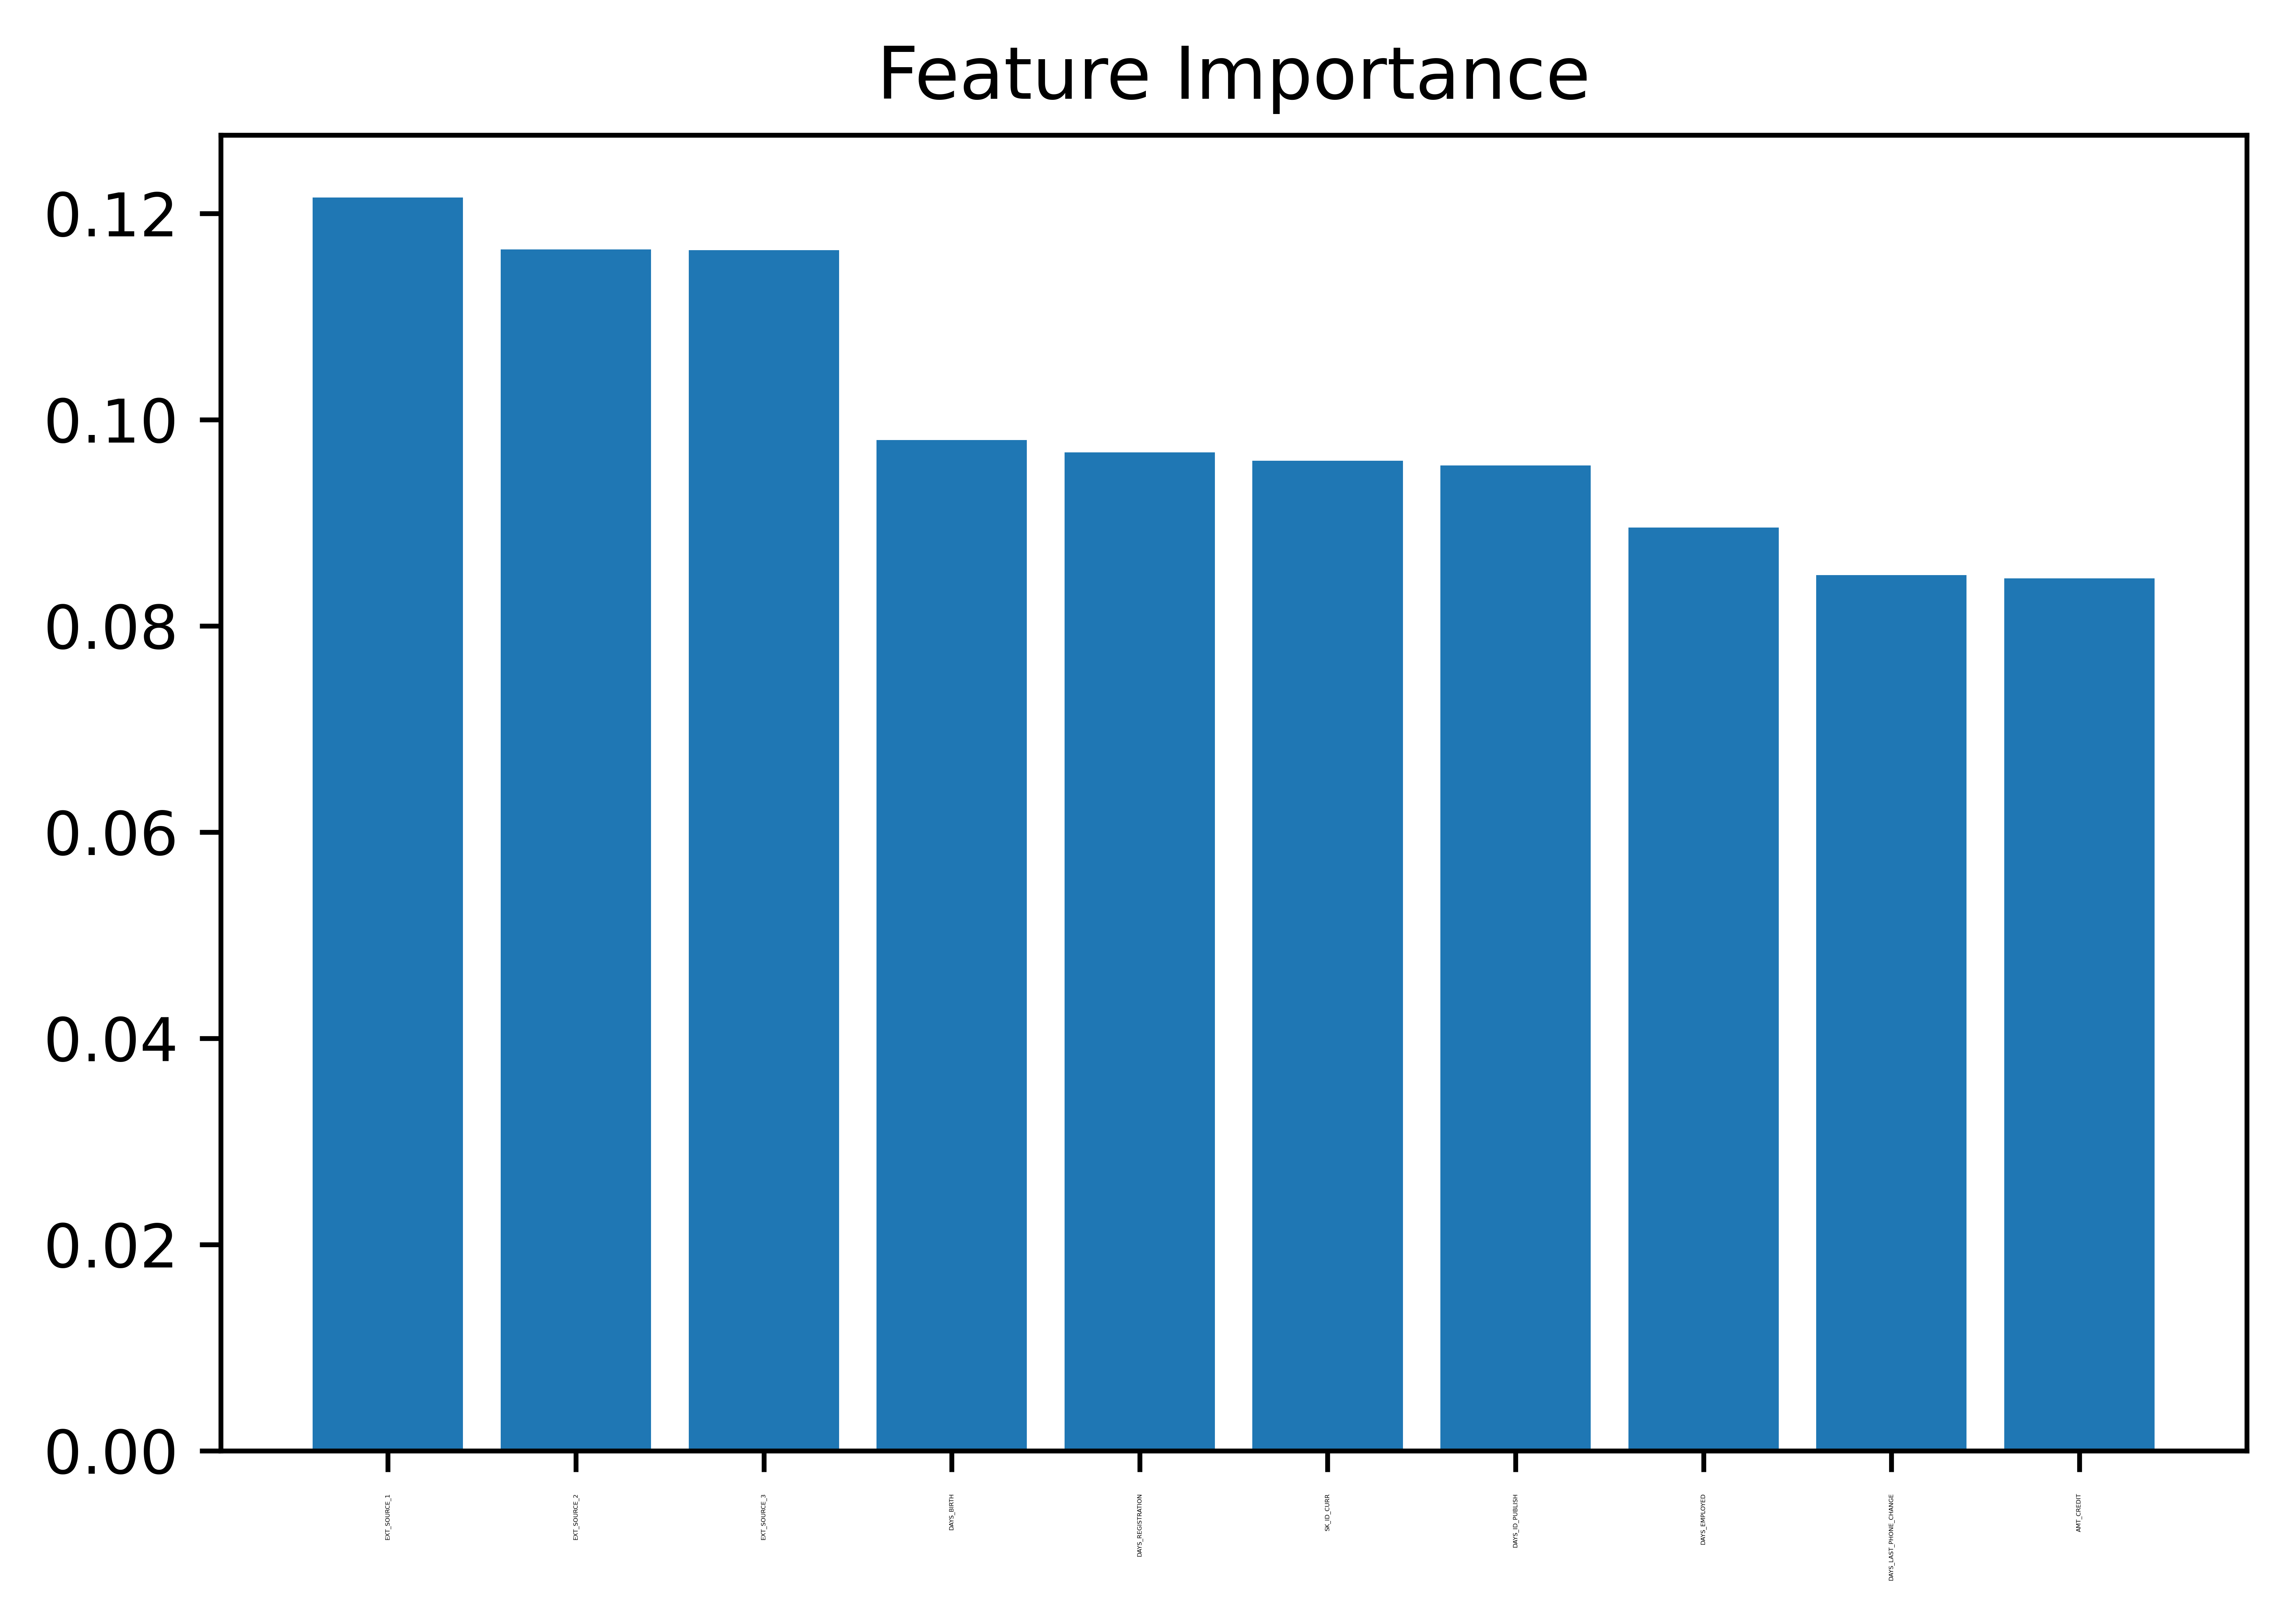

In [216]:
#this sets the parameters of our bar chart
plt.figure(dpi=1200)
plt.title("Feature Importance")
plt.bar(range(X6.shape[1]), imp6[imp_sort6], align = 'center')
plt.xticks(range(X6.shape[1]), X6.columns[imp_sort6], rotation = 90)
plt.tick_params(axis = 'x', which='major', labelsize = 1)
plt.show()

In [217]:
#RESULTS
#Now our new random forest shows that all the top 10 variables are similarly significant. 
#It seems clear that the top 3 variables are consistently, EXT_SOURCE_3, EXT_SOURCE_2 & EXT_SOURCE_1.
#Since our matricies were the same for both decision tree we can assume that both are giving back
#similar results. Overall, this says that I chose my top 10 wisely and I was able to capture the
#majority of the most influentuial variables. We can also note that the order change when running the
#random forest on only the 10 highest ranked terms could actually depict a more accurate order. My
#reasoning for this is that it ended up using a much more complete data set to run the training.
#There were 109483 rows of data as opposed to the 8602  rows of data used the first time.
#Replacing the NaN(empty values) in the future using other techniques could significantly impact the
#accuracy of the data. However I would still argue that EXT_SOURCE_3, EXT_SOURCE_2 & EXT_SOURCE_1
#will continue to be the most influential variables.